   customer_id  gender  senior_citizen partner dependents  tenure  \
0         1001    Male               0     Yes         No      12   
1         1002  Female               0      No         No       1   
2         1003    Male               1     Yes         No      45   
3         1004  Female               0     Yes        Yes      60   
4         1005    Male               0      No         No       3   

  phone_service internet_service  monthly_charges  total_charges churn  
0           Yes      Fiber optic             85.5         1026.0   Yes  
1           Yes              DSL             45.0           45.0   Yes  
2           Yes      Fiber optic             99.2         4464.0    No  
3           Yes              DSL             65.0         3900.0    No  
4           Yes      Fiber optic             89.9          269.7   Yes  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype

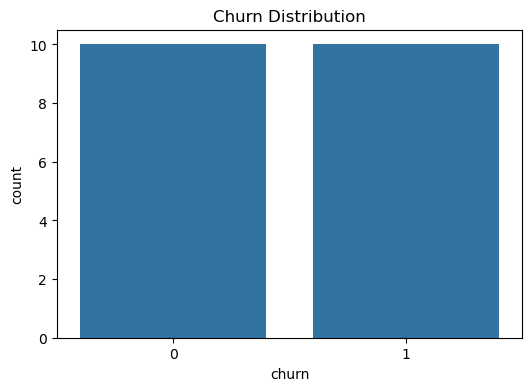

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import os

# Load dataset
final_path = os.path.join(os.getcwd(),r"data/customer_churn.csv")
df = pd.read_csv(final_path)
print(df.head())
print(df.info())

# Clean data
df.replace(" ", np.nan, inplace=True)
df.dropna(inplace=True)

# Encode categorical columns
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# Features & target
X = df.drop("churn", axis=1)
y = df["churn"]

# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Logistic Regression
log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train, y_train)
preds_log = log_model.predict(X_test)

print("\nLogistic Regression Accuracy:", accuracy_score(y_test, preds_log))
print(confusion_matrix(y_test, preds_log))

# Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
preds_rf = rf_model.predict(X_test)

print("\nRandom Forest Accuracy:", accuracy_score(y_test, preds_rf))
print(confusion_matrix(y_test, preds_rf))
print(classification_report(y_test, preds_rf))

# Visualization
plt.figure(figsize=(6,4))
sns.countplot(x='churn', data=df)
plt.title("Churn Distribution")
plt.show()
